In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

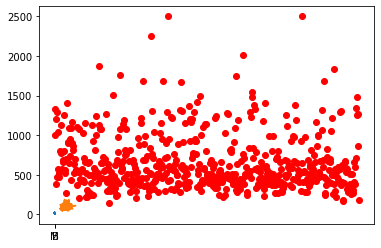

In [2]:
dataset = pd.read_csv('/home/zahrael97/Téléchargements/deep learning/project/project1: brest cancer/data.csv')
dataset.drop('Unnamed: 32', inplace=True, axis=1)
plt.plot(dataset['diagnosis'],dataset['radius_mean'],dataset['texture_mean'],dataset['perimeter_mean'],dataset['area_mean'],'or')
plt.show()

In [3]:
print(dataset)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M       17.990         10.38          122.80     1001.0   
1      842517         M       20.570         17.77          132.90     1326.0   
2    84300903         M       19.690         21.25          130.00     1203.0   
3    84348301         M       11.420         20.38           77.58      386.1   
4    84358402         M       20.290         14.34          135.10     1297.0   
5      843786         M       12.450         15.70           82.57      477.1   
6      844359         M       18.250         19.98          119.60     1040.0   
7    84458202         M       13.710         20.83           90.20      577.9   
8      844981         M       13.000         21.82           87.50      519.8   
9    84501001         M       12.460         24.04           83.97      475.9   
10     845636         M       16.020         23.24          102.70      797.8   
11   84610002         M     

In [4]:
dataset.shape

(569, 32)

In [5]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1:2].values

In [7]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [8]:
#categorical values
from sklearn.preprocessing import LabelEncoder
label_y = LabelEncoder()
y_train = label_y.fit_transform(y_train)
y_test = label_y.transform(y_test)

/home/zahrael97/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zahrael97/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
#fitting
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(n_jobs= -1)
classifier.fit(X_train, y_train)

/home/zahrael97/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/zahrael97/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
#predicting
y_pred = classifier.predict(X_test)

In [11]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[77,  1],
       [ 3, 33]])

In [12]:
# classification analysis
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        78
           1       0.97      0.92      0.94        36

   micro avg       0.96      0.96      0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [13]:
# k-fold cross vallidation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train,cv= 10, n_jobs=-1)
print(accuracies.mean(), accuracies.std())

0.9450175669740888 0.041709887243475734
